In [22]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from cloudy_fit_lib import *
from scipy.interpolate import RegularGridInterpolator
import pickle

In [23]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

In [24]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/cloudy_grids/hm12_vs_hm05/'

Obtain the UVB grids from HM05 and HM12

In [25]:
hm05_z_grid, hm05_wav_grid, hm05_J_nu_grid = read_uvb('', 'hm05_galaxy.ascii')
hm12_z_grid, hm12_wav_grid, hm12_J_nu_grid = read_uvb('', 'hm12_galaxy.ascii')

Fetch the SED at $z=0.4$

In [26]:
z_test = 0.4

In [27]:
hm05_J_nu_test = fetch_sed(z_test, hm05_z_grid, hm05_J_nu_grid)
hm12_J_nu_test = fetch_sed(z_test, hm12_z_grid, hm12_J_nu_grid)

In [28]:
filename_hm05 = 'igm_lalpha_hm05_grid_1650'
filename_hm12 = 'igm_lalpha_hm12_grid_1650'

Specify grid points for densities

In [29]:
log_hdens_min = -5
log_hdens_max = 1
log_hdens_step = 0.25

log_hdens_arr = np.arange(log_hdens_min, log_hdens_max+log_hdens_step, log_hdens_step)

In [30]:
logU_arr_hm05 = np.log10(calc_U(hm05_wav_grid, hm05_J_nu_test, 10**log_hdens_arr))
logU_arr_hm12 = np.log10(calc_U(hm12_wav_grid, hm12_J_nu_test, 10**log_hdens_arr))

Compile column densities

In [35]:
# Get average (log) HI temperatures for all grid points
log_temps_grid_hm05 = read_avr_file(rootdir+'hm05/', filename_hm05)
log_temps_grid_hm12 = read_avr_file(rootdir+'hm12/', filename_hm12)

In [42]:
species_logN_samples_hm05 = {}
species_logN_samples_hm12 = {}

# Get column densities for all species
species_names_hm05, log_col_dens_grid_hm05 = read_col_file(rootdir+'hm05/', filename_hm05)
species_names_hm12, log_col_dens_grid_hm12 = read_col_file(rootdir+'hm12/', filename_hm12)

for i in range(len(species_names_hm05)):
    s = species_names_hm05[i]
    species_logN_samples_hm05[s] = log_col_dens_grid_hm05[:,i]
    species_logN_samples_hm12[s] = log_col_dens_grid_hm12[:,i]

In [ ]:
fig, axes = plt,.subplots(1, figsize=(3,3))

Text(0.5, 1.0, '$N_\\mathrm{HI}=16.5, [\\mathrm{M/H}] = -0.5, z=0.4$')

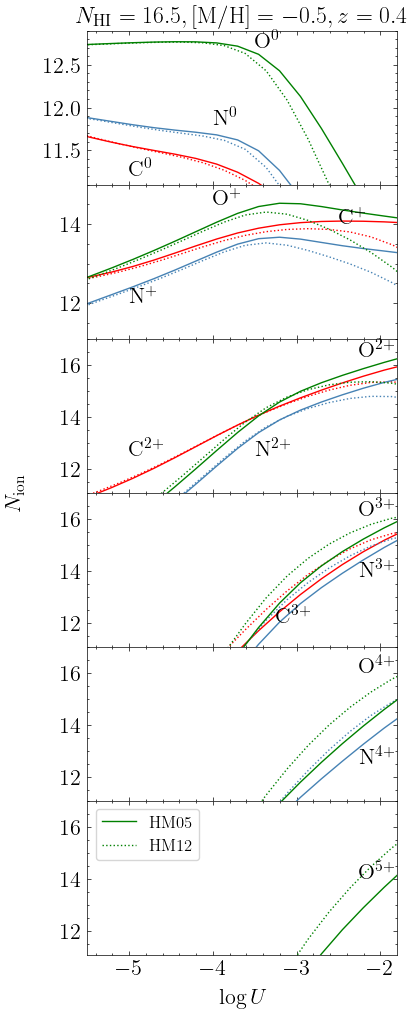

In [147]:
fig, axes = plt.subplots(6, figsize=(4,2*6), sharex=True)

# Neutral
axes[0].plot(logU_arr_hm05, species_logN_samples_hm05['C'], color='red', linestyle='-')
axes[0].plot(logU_arr_hm12, species_logN_samples_hm12['C'], color='red', linestyle=':')
axes[0].text(-5, 11.2, r'$\mathrm{C}^{0}$')

axes[0].plot(logU_arr_hm05, species_logN_samples_hm05['N'], color='steelblue', linestyle='-')
axes[0].plot(logU_arr_hm12, species_logN_samples_hm12['N'], color='steelblue', linestyle=':')
axes[0].text(-4, 11.8, r'$\mathrm{N}^{0}$')

axes[0].plot(logU_arr_hm05, species_logN_samples_hm05['O'], color='green', linestyle='-')
axes[0].plot(logU_arr_hm12, species_logN_samples_hm12['O'], color='green', linestyle=':')
axes[0].text(-3.5, 12.7, r'$\mathrm{O}^{0}$')

axes[0].set_xlim(-5.5, -1.8)
axes[0].set_ylim(11.1, 12.9)

# +

axes[1].plot(logU_arr_hm05, species_logN_samples_hm05['C+'], color='red', linestyle='-')
axes[1].plot(logU_arr_hm12, species_logN_samples_hm12['C+'], color='red', linestyle=':')
axes[1].text(-2.5, 14.0, r'$\mathrm{C}^{+}$')

axes[1].plot(logU_arr_hm05, species_logN_samples_hm05['N+'], color='steelblue', linestyle='-')
axes[1].plot(logU_arr_hm12, species_logN_samples_hm12['N+'], color='steelblue', linestyle=':')
axes[1].text(-5, 12.0, r'$\mathrm{N}^{+}$')

axes[1].plot(logU_arr_hm05, species_logN_samples_hm05['O+'], color='green', linestyle='-')
axes[1].plot(logU_arr_hm12, species_logN_samples_hm12['O+'], color='green', linestyle=':')
axes[1].text(-4, 14.5, r'$\mathrm{O}^{+}$')

axes[1].set_ylim(11.1, 15.0)

# 2+

axes[2].plot(logU_arr_hm05, species_logN_samples_hm05['C+2'], color='red', linestyle='-')
axes[2].plot(logU_arr_hm12, species_logN_samples_hm12['C+2'], color='red', linestyle=':')
axes[2].text(-5, 12.5, r'$\mathrm{C}^{2+}$')

axes[2].plot(logU_arr_hm05, species_logN_samples_hm05['N+2'], color='steelblue', linestyle='-')
axes[2].plot(logU_arr_hm12, species_logN_samples_hm12['N+2'], color='steelblue', linestyle=':')
axes[2].text(-3.5, 12.5, r'$\mathrm{N}^{2+}$')

axes[2].plot(logU_arr_hm05, species_logN_samples_hm05['O+2'], color='green', linestyle='-')
axes[2].plot(logU_arr_hm12, species_logN_samples_hm12['O+2'], color='green', linestyle=':')
axes[2].text(-2.25, 16.3, r'$\mathrm{O}^{2+}$')

axes[2].set_ylim(11.1, 17.0)

# 3+

axes[3].plot(logU_arr_hm05, species_logN_samples_hm05['C+3'], color='red', linestyle='-')
axes[3].plot(logU_arr_hm12, species_logN_samples_hm12['C+3'], color='red', linestyle=':')
axes[3].text(-3.25, 12.0, r'$\mathrm{C}^{3+}$')

axes[3].plot(logU_arr_hm05, species_logN_samples_hm05['N+3'], color='steelblue', linestyle='-')
axes[3].plot(logU_arr_hm12, species_logN_samples_hm12['N+3'], color='steelblue', linestyle=':')
axes[3].text(-2.25, 13.8, r'$\mathrm{N}^{3+}$')

axes[3].plot(logU_arr_hm05, species_logN_samples_hm05['O+3'], color='green', linestyle='-')
axes[3].plot(logU_arr_hm12, species_logN_samples_hm12['O+3'], color='green', linestyle=':')
axes[3].text(-2.25, 16.1, r'$\mathrm{O}^{3+}$')

axes[3].set_ylim(11.1, 17.0)

#ax.set_xlabel(r'$\log U$')
#ax.set_ylabel(r'$\log N_\mathrm{ion}$')

# 4+
axes[4].plot(logU_arr_hm05, species_logN_samples_hm05['N+4'], color='steelblue', linestyle='-')
axes[4].plot(logU_arr_hm12, species_logN_samples_hm12['N+4'], color='steelblue', linestyle=':')
axes[4].text(-2.25, 12.5, r'$\mathrm{N}^{4+}$')

axes[4].plot(logU_arr_hm05, species_logN_samples_hm05['O+4'], color='green', linestyle='-')
axes[4].plot(logU_arr_hm12, species_logN_samples_hm12['O+4'], color='green', linestyle=':')
axes[4].text(-2.25, 16.0, r'$\mathrm{O}^{4+}$')

axes[4].set_ylim(11.1, 17.0)

# 5+

axes[5].plot(logU_arr_hm05, species_logN_samples_hm05['O+5'], color='green', linestyle='-', label='HM05')
axes[5].plot(logU_arr_hm12, species_logN_samples_hm12['O+5'], color='green', linestyle=':', label='HM12')
axes[5].text(-2.25, 14.0, r'$\mathrm{O}^{5+}$')

axes[5].set_ylim(11.1, 17.0)

axes[5].legend()

plt.subplots_adjust(wspace=0.3, hspace=0)

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

ax_label.set_xlabel(r'$\log U$', labelpad=25)
ax_label.set_ylabel(r'$N_\mathrm{ion}$', labelpad=45)

ax_label.set_title(r'$N_\mathrm{HI}=16.5, [\mathrm{M/H}] = -0.5, z=0.4$', fontsize=17)